## Seattle Housing Prices Dashboard ##

In [1]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
import seaborn as sns
from MCForecastTools import MCSimulation
import json
import hvplot.pandas


import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\Joanne\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read the Mapbox API key
load_dotenv("joanne.env")
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

## Import Data ##

In [18]:
# Import the CSVs to Pandas DataFrames
file_path = Path("housing_prices_month_aggregate_clean.csv") 
housing_data = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

file_path = Path("Asset_Prices_Month.csv") 
asset_data = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

file_path = Path("housing_price_year_clean_new.csv")
sea_data = pd.read_csv(file_path, index_col="Year of Period End")

file_path = Path("../Resources/housing_prices_month_clean_transposed.csv") 
housing_price_mnth_df = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

file_path = Path("housing_prices_mnth_clean.csv") 



In [20]:
file_path = Path("housing_price_year_clean_new.csv")
sea_data = pd.read_csv(file_path, index_col="Year of Period End")


## Panel Visulaization ##

In [13]:
# Define Panel Visualization Functions
def historical_Seattle_Housing_prices():
   """" Historical Seattle Housing Prices"""
   
    
    housing_price_mnth_df.plot(figsize=(20, 10), title="Historical Seattle Housing Prices")
    plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=9)
    
    return pn.pane.Matplotlib()

def Percent_Change_In_Median_Sale_price():
    """" Percent Change In Median Sale price """
    
    housing_price_mnth_df_set = housing_price_mnth_df.set_index("Date")
housing_price_mnth_df_set.head()
    
    pct_change_prices_df['pct_change'] = pct_change_prices_df['pct_change'] *100
    pct_change_prices_df['Date'] = pd.to_datetime(pct_change_prices_df['Date'])
    pct_change_prices_df_plot = pct_change_prices_df.hvplot.line(
    xformatter = DatetimeTickFormatter(months = ['%m/%Y', '%b %Y'], years = ['%b %Y']),
    x='Date',
    y='pct_change', 
    xlabel='Date', 
    ylabel='% Change Median Sale Price', 
    color='purple', 
    width = 700,
    title='Percentage Change In Median Sale Price',
    rot=45,
    groupby='Region',
    )
    hover = HoverTool(tooltips=[("Change", "@pct_change{0.2f}%"),
                            ("Date",  "@Date{%Y/%m/%d}")
                           ],
                  formatters = {'@Date': 'datetime'}
                 )
    pct_change_prices_df_plot.opts(tools=[hover])

    return pct_change_prices_df_plot



In [23]:
Percent_Change_In_Median_Sale_price()

NameError: name 'Percent_Change_In_Median_Sale_price' is not defined

Matplotlib(None)

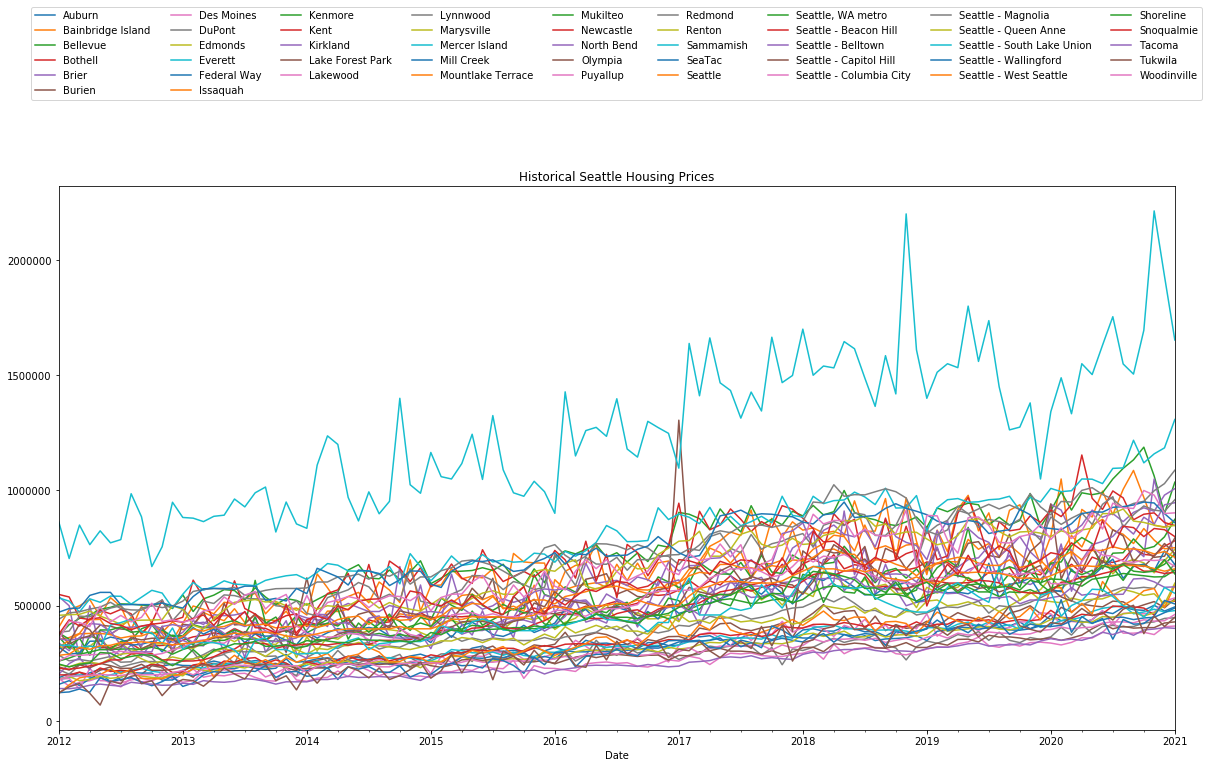

In [16]:
#historical_Seattle_Housing_prices()

## Panel Dashboard ##

In [ ]:
# Create a Title for the Dashboard
title = pn.pane.Markdown(
    """
# Seattle Housing Price Analysis 
""",
    width=800,
)

welcome = pn.pane.Markdown(
    """
This dashboard presents a visual analysis of historical prices of 
greater Seattle area.

"""
)

# Create a tab layout for the dashboard
tabs = pn.Tabs(
    ("Welcome", pn.Column(welcome, neighborhood_map())),
    ("Seattle houseing prices", pn.Column(historical_Seattle_Housing_prices(),),
    ("Stocks Analysis", pn.Column()),
    ("Future House price predication", pn.Column(,
    )

dashboard = pn.Column(pn.Row(title), tabs, width=900)

## Serve the Panel Dashboard ##

In [ ]:
dashboard.servable()